# RFM Analysis of Online Sales Dataset

- RFM analysis is a marketing technique used to analyze and categorize customers based on their purchasing behavior. The acronym RFM stands for Recency, Frequency, and Monetary Value, which are three key dimensions used to segment and understand customer segments. Here's a brief overview of each component:

- Recency (R): This measures how recently a customer has made a purchase. Customers who have made a purchase more recently are often considered more valuable because they are likely to be active and engaged.

- Frequency (F): This measures how often a customer makes a purchase. Customers who make frequent purchases are often considered more valuable because they contribute consistently to revenue.

- Monetary Value (M): This measures the total monetary value of a customer's purchases. Customers who have spent more money are considered more valuable because they contribute significantly to the overall revenue.

By analyzing these three dimensions, businesses can segment their customer base into different groups, allowing for targeted marketing strategies

In [90]:

import squarify as sq
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
# Importing online sales dataset
online=pd.read_csv('data.csv' , encoding = "ISO-8859-1")

In [92]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [93]:
online.shape


(541909, 8)

In [94]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [95]:
# Updating 
online.InvoiceDate=pd.to_datetime(online.InvoiceDate)

In [96]:
online.InvoiceDate.dt.date

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: InvoiceDate, Length: 541909, dtype: object

In [97]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [98]:
#counting number of null customer IDs
print('Count of instances with null customer ID : {}'.format(online[online.CustomerID.isnull()].shape[0]))

Count of instances with null customer ID : 135080


In [99]:
# Drop null valued instances
online.dropna(inplace=True)

In [100]:
print('Count of instances with null customer ID : {}'.format(online[online.CustomerID.isnull()].shape[0]))

Count of instances with null customer ID : 0


In [101]:
#Function for extracting month from the InvoiceDate
def get_month(x): return dt.datetime(x.year,x.month,1)

online["InvoiceMonth"]=online['InvoiceDate'].apply(get_month)
grouping=online.groupby('CustomerID')['InvoiceMonth']


In [102]:
grouping.head()

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541768   2011-12-01
541769   2011-12-01
541770   2011-12-01
541771   2011-12-01
541772   2011-12-01
Name: InvoiceMonth, Length: 21206, dtype: datetime64[ns]

In [103]:
online['CohortMonth']=grouping.transform('min')

In [104]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [105]:
# Extract Integer Values from date

def get_date_int(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

In [106]:

# Calculating time offset between purchases

invoice_year,invoice_month,_=get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month,_=get_date_int(online, 'CohortMonth')
years_diff=invoice_year-cohort_year
months_diff=invoice_month-cohort_month
online['CohortIndex']=years_diff*12+months_diff+1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [107]:
# counting monthly active customers from each cohort.
groups=online.groupby(['CohortMonth','CohortIndex'])
cohort_data=groups['CustomerID'].apply(pd.Series.nunique)
cohort_data=cohort_data.reset_index()
cohort_counts=cohort_data.pivot(index='CohortMonth', columns='CohortIndex',values='CustomerID')
cohort_counts.head(15)
# groups.head(15)



CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# retention rate

cohort_sizes=cohort_counts.iloc[:,0]
# cohort_sizes

#Divide all values in cohort_counts table by cohort sizes

retention=cohort_counts.divide(cohort_sizes,axis=0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


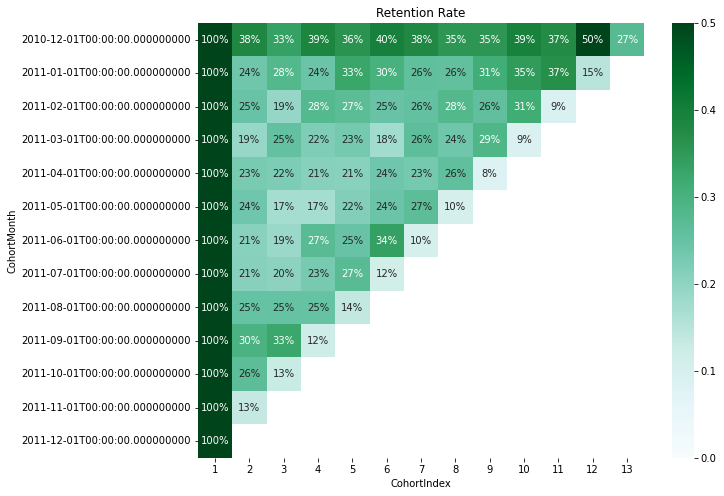

In [109]:
# Plotting retention heatmap

plt.figure(figsize=(10,8))
plt.title('Retention Rate')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0,vmax=0.5, cmap='BuGn')
plt.show()

In [110]:
print("Min:{},\n Max:{}".
      format(min(online['InvoiceDate']),max(online['InvoiceDate'])))

Min:2010-12-01 08:26:00,
 Max:2011-12-09 12:50:00


In [111]:
# Creating snapshot Date
snapshot_date=max(online.InvoiceDate)+dt.timedelta(days=1)
print(snapshot_date)

2011-12-10 12:50:00


In [112]:
# Create TotalSum column using Quanitity and UnitPrice columns from online dataset
online['TotalSum'] = online['Quantity'] * online['UnitPrice']


In [113]:
#Calculating RFM metrics
RFMdata=online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x:(snapshot_date-x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum' : 'sum'
})

#Renaming columns RFM

RFMdata.rename(columns={'InvoiceDate': 'Recency',
                        'InvoiceNo':'Frequency',
                        'TotalSum': 'MonetaryValue'},inplace=True)

print(RFMdata)

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          2           0.00
12347.0           2        182        4310.00
12348.0          75         31        1797.24
12349.0          19         73        1757.55
12350.0         310         17         334.40
...             ...        ...            ...
18280.0         278         10         180.60
18281.0         181          7          80.82
18282.0           8         13         176.60
18283.0           4        756        2094.88
18287.0          43         70        1837.28

[4372 rows x 3 columns]


C:\Users\prana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

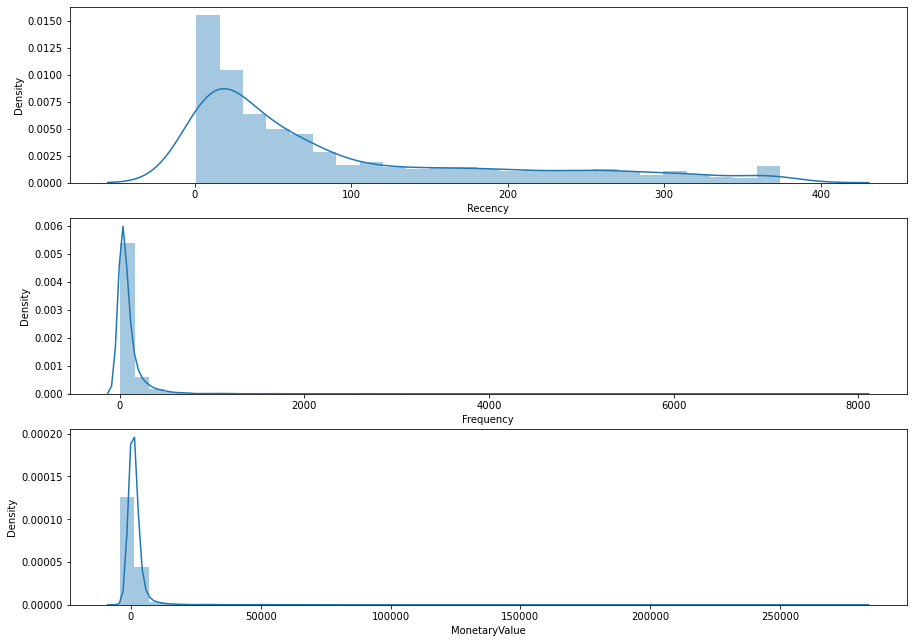

In [129]:
# Plot RFM distributions
plt.figure(figsize=(15,11))
# Plot distribution of R- Recency
plt.subplot(3, 1, 1); sns.distplot(RFMdata['Recency'])
# Plot distribution of F- Frequency
plt.subplot(3, 1, 2); sns.distplot(RFMdata['Frequency'])
# Plot distribution of M- MonetaryValue
plt.subplot(3, 1, 3); sns.distplot(RFMdata['MonetaryValue'])
# Show the plot
plt.show()

In [115]:
RFMdata=RFMdata.sort_values('Frequency', ascending=False)

In [116]:
# Assigning labels for RFM
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(RFMdata['Recency'], 4, labels = r_labels)
RFMdata = RFMdata.assign(R = r_quartiles.values)


f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(RFMdata['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(RFMdata['MonetaryValue'], 4, labels = m_labels)
RFMdata = RFMdata.assign(F = (f_quartiles.values))
RFMdata = RFMdata.assign(M = (m_quartiles.values))

In [117]:
RFMdata.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
17841.0,2,7983,40340.78,4,4,4
14911.0,1,5903,132572.62,4,4,4
14096.0,4,5128,57120.91,4,4,4
12748.0,1,4642,29072.10,4,4,4
14606.0,1,2782,11713.85,4,4,4


In [118]:
# Function to concat RFM values into RFM score
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])
RFMdata['RFM_Segment'] = RFMdata.apply(join_rfm, axis=1)
RFMdata['RFM_Score'] = RFMdata[['R','F','M']].sum(axis=1)

RFMdata.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
17841.0,2,7983,40340.78,4,4,4,4.04.04.0,12
14911.0,1,5903,132572.62,4,4,4,4.04.04.0,12
14096.0,4,5128,57120.91,4,4,4,4.04.04.0,12
12748.0,1,4642,29072.10,4,4,4,4.04.04.0,12
14606.0,1,2782,11713.85,4,4,4,4.04.04.0,12


In [132]:
# Count num of unique segments to cluster the customers into
rfm_count_unique = RFMdata.groupby('RFM_Score')['RFM_Score'].nunique()
print(rfm_count_unique.sum())

10


In [144]:
#Function for creating clusters
def segment_me(df):
    if df['RFM_Score']>=9:
        return 'Must Keep Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Diamond'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Prospective'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Growing'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Account Requires Activation'
# Create a new variable RFM_Level
RFMdata['RFM_segments'] = RFMdata.apply(segment_me, axis=1)
# Print the header with top 5 rows to the console
RFMdata.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_segments
CustomerID,,,,,,,,,
17841.0,2,7983,40340.78,4,4,4,4.04.04.0,12,Must Keep Them
14911.0,1,5903,132572.62,4,4,4,4.04.04.0,12,Must Keep Them
14096.0,4,5128,57120.91,4,4,4,4.04.04.0,12,Must Keep Them
12748.0,1,4642,29072.10,4,4,4,4.04.04.0,12,Must Keep Them
14606.0,1,2782,11713.85,4,4,4,4.04.04.0,12,Must Keep Them


In [145]:
# Calculate average values for each RFM_segment,and member count for each segment 
RFM_data_agg=RFMdata.groupby('RFM_segments').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue': ['mean','count']}).round(1)

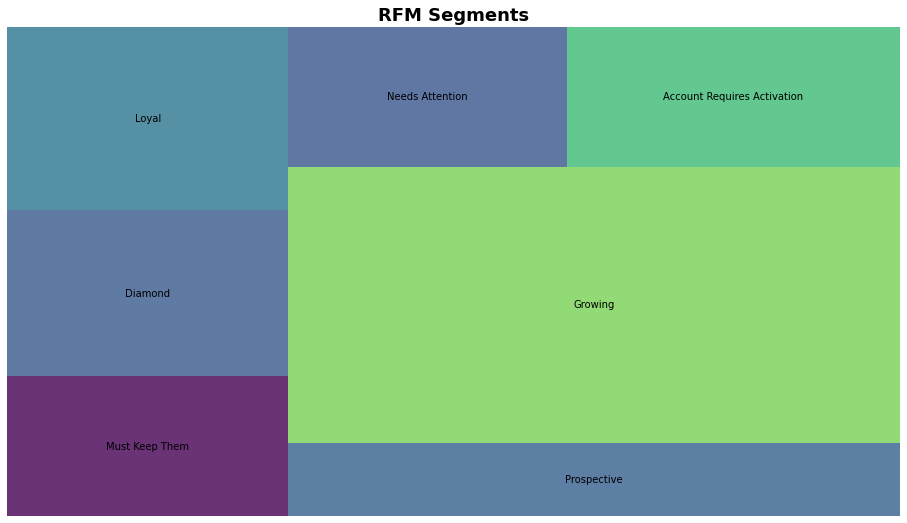

In [146]:
RFM_data_agg.columns = RFM_data_agg.columns.droplevel()
RFM_data_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
sq.plot(sizes=RFM_data_agg['Count'], 
              label=['Must Keep Them',
                     'Diamond',
                     'Loyal',
                     'Prospective',
                     'Growing', 
                     'Needs Attention', 
                     'Account Requires Activation'], alpha=.8 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()